# Download IGRINS data from Google Drive

IGRINS stores all of its data on Google Drive.  Here we show how to programmatically fetch that data with Python.

In [1]:
from muler.igrins import IGRINSSpectrum
import requests
%matplotlib inline
%config InlineBackend.figure_format='retina'

For now, you need the filename and Google Drive ID for a spectrum.  Eventually this information may come from an observation Log provided by the IGRINS team.  At the moment, I just retrieved this information by navigating to the Google Drive website.

These data are already public on the [muler_example_date repo](https://github.com/OttoStruve/muler_example_data/tree/main/IGRINS/01_IGRINS_test_data), but I uploaded them to a public Google Drive for the purpose of this demo.  Eventually the entire IGRINS archive will be in a public Google Drive like this.

In [2]:
download_dictionary = {'SDCH_20201202_0059.spec_a0v.fits':'1tBY0NCcTnnCkvXXvFNOiqd4e10S6W2RB',
                       'SDCH_20201202_0059.sn.fits':'1NlIUWPxiN_nkZ83JsTzXby_5ihSSZ34o'}

We need two files because the IGRINS pipeline houses the uncertainty values in a separate file from the flux values.

In [3]:
def download_file(filename, file_id):
    """Download the file from Google Drive"""
    URL = "https://docs.google.com/uc?export=download"
    session = requests.Session()
    response = session.get(URL, params = { 'id' : file_id }, stream = True)
    if response.status_code == 200: # Successfully found the file on Google Drive
        CHUNK_SIZE = 32768

        with open(filename, "wb") as f:
            for chunk in response.iter_content(CHUNK_SIZE):
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
        print("Downloaded {}".format(filename))

In [4]:
for key, value in download_dictionary.items():
    download_file(key, value)

Downloaded SDCH_20201202_0059.spec_a0v.fits
Downloaded SDCH_20201202_0059.sn.fits


Hooray, we downloaded the files! They are saved in the local directory.    
We can simply read them in by handing-in the filename:

In [5]:
spectrum = IGRINSSpectrum(file='SDCH_20201202_0059.spec_a0v.fits', order=11).normalize()

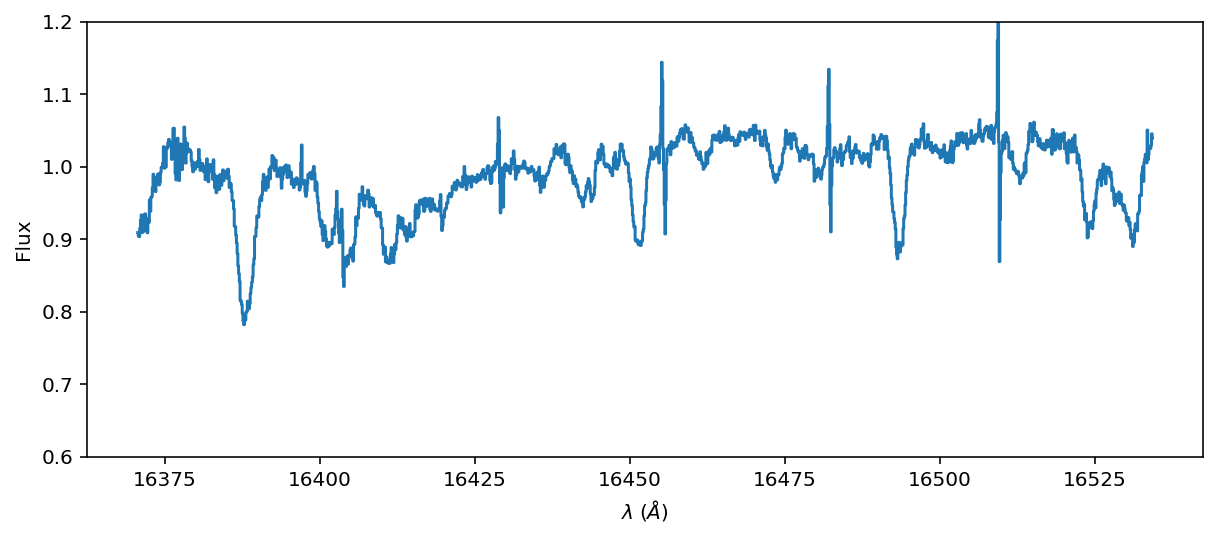

In [6]:
spectrum = spectrum.trim_edges().remove_nans()
spectrum.plot();

Great, we fetched the spectrum from Google Drive, did some light post-processing, and plotted it!